In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip


In [2]:
import pandas as pd
import zipfile
import os

# Paths to zip files
zip_files = ["/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip", 
             "/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip", 
             "/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip"]

# Unzip all files
for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall("data")

# Load datasets
features = pd.read_csv("data/features.csv")
stores = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv")
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# Quick data check
print(f"Features Shape: {features.shape}")
print(f"Stores Shape: {stores.shape}")
print(f"Train Shape: {train.shape}")
print(f"Test Shape: {test.shape}")

Features Shape: (8190, 12)
Stores Shape: (45, 3)
Train Shape: (421570, 5)
Test Shape: (115064, 4)


In [3]:
# Merge feature and store data with train and test sets
train = train.merge(features, how='left', on=['Store', 'Date', 'IsHoliday'])
train = train.merge(stores, how='left', on='Store')

test = test.merge(features, how='left', on=['Store', 'Date', 'IsHoliday'])
test = test.merge(stores, how='left', on='Store')


In [4]:
train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


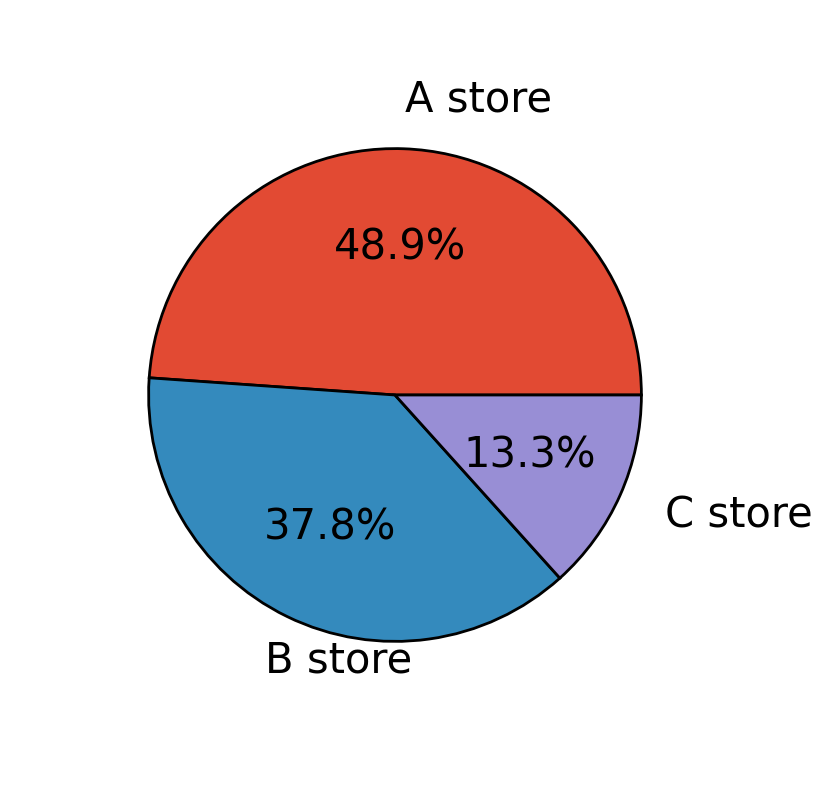

In [5]:
import matplotlib.pyplot as plt

# Define store data
store_data = {
    'Type': ['A store', 'B store', 'C store'],
    'Count': [22, 17, 6]  # Original counts
}

# Calculate percentages
total = sum(store_data['Count'])
percentages = [count/total * 100 for count in store_data['Count']]

# Set up the plot style
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 10))

# Custom properties
wedge_properties = {
    'edgecolor': 'black',
    'linewidth': 2
}

text_properties = {
    'fontsize': 30
}

# Create pie chart
ax.pie(
    percentages,
    labels=store_data['Type'],
    explode=(0.0, 0, 0),
    autopct='%1.1f%%',
    pctdistance=0.6,
    labeldistance=1.2,
    wedgeprops=wedge_properties,
    textprops=text_properties,
    radius=0.8,
    center=(0.5, 0.5)
)

plt.show()

საშუალო გაყიდვები მოსალოდნელია რომ A-ს ექნება ყველაზე მაღალი.

/tmp/ipykernel_36/152680449.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


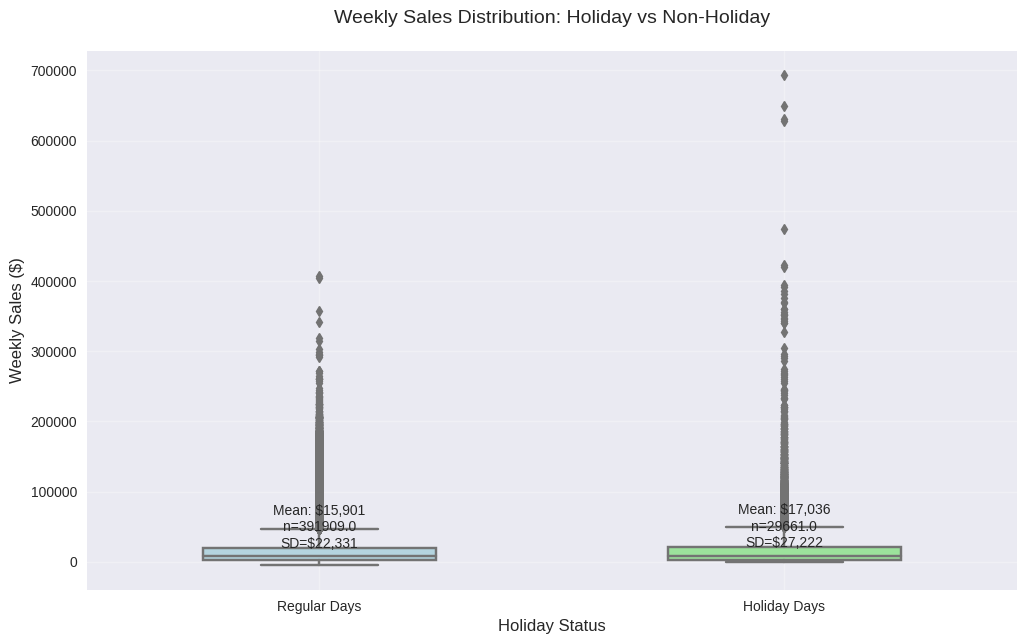


Detailed Statistics:
               mean   median   count       std
IsHoliday                                     
False      15901.45  7589.95  391909  22330.75
True       17035.82  7947.74   29661  27222.00


In [6]:
# Create analysis of sales by holiday status
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure style and size
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12, 7))

# Create enhanced visualization
sales_analysis = sns.boxplot(
    data=train,
    x='IsHoliday',
    y='Weekly_Sales',
    palette=['lightblue', 'lightgreen'],
    width=0.5
)

# Calculate summary statistics
summary_stats = train.groupby('IsHoliday')['Weekly_Sales'].agg([
    'mean',
    'median',
    'count',
    'std'
]).round(2)

# Enhance plot appearance
plt.title('Weekly Sales Distribution: Holiday vs Non-Holiday', pad=20, fontsize=14)
plt.xlabel('Holiday Status', fontsize=12)
plt.ylabel('Weekly Sales ($)', fontsize=12)

# Modify x-axis labels
ax.set_xticklabels(['Regular Days', 'Holiday Days'])

# Add statistical annotations
for i, metrics in summary_stats.iterrows():
    plt.text(
        i, 
        metrics['mean'],
        f"Mean: ${metrics['mean']:,.0f}\n"
        f"n={metrics['count']}\n"
        f"SD=${metrics['std']:,.0f}",
        horizontalalignment='center',
        verticalalignment='bottom'
    )

plt.grid(True, alpha=0.3)
plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
print(summary_stats)

In [7]:
train['Date']

0         2010-02-05
1         2010-02-12
2         2010-02-19
3         2010-02-26
4         2010-03-05
             ...    
421565    2012-09-28
421566    2012-10-05
421567    2012-10-12
421568    2012-10-19
421569    2012-10-26
Name: Date, Length: 421570, dtype: object

In [8]:
# Ensure 'Date' columns are in datetime format
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [9]:
train['Date']

0        2010-02-05
1        2010-02-12
2        2010-02-19
3        2010-02-26
4        2010-03-05
            ...    
421565   2012-09-28
421566   2012-10-05
421567   2012-10-12
421568   2012-10-19
421569   2012-10-26
Name: Date, Length: 421570, dtype: datetime64[ns]

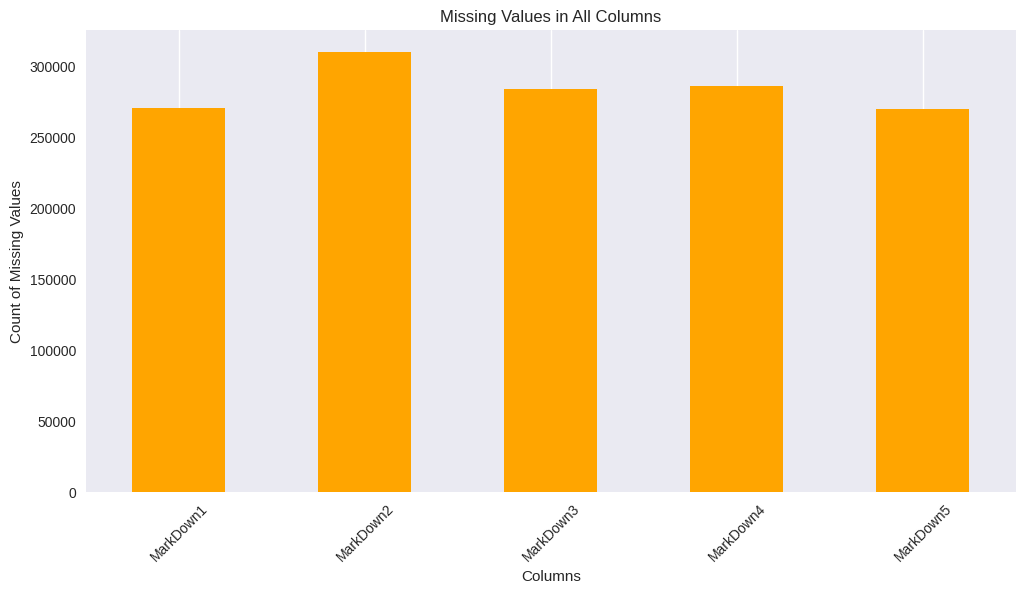

In [10]:
#To visualize the missing values
import matplotlib.pyplot as plt

na_counts = train.isna().sum()

# Filter out columns with zero missing values
na_counts = na_counts[na_counts > 0]

# Plotting
plt.figure(figsize=(12, 6))
na_counts.plot(kind='bar', color='orange')
plt.title('Missing Values in All Columns')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [11]:
# Replace missing values in markdown-related columns with zero
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)


In [12]:
# Add new columns for year, month, week, and weekday
for dataset in [train, test]:
    dataset['Year'] = dataset['Date'].dt.year
    dataset['Month'] = dataset['Date'].dt.month
    dataset['Week'] = dataset['Date'].dt.isocalendar().week
    dataset['DayOfWeek'] = dataset['Date'].dt.dayofweek


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

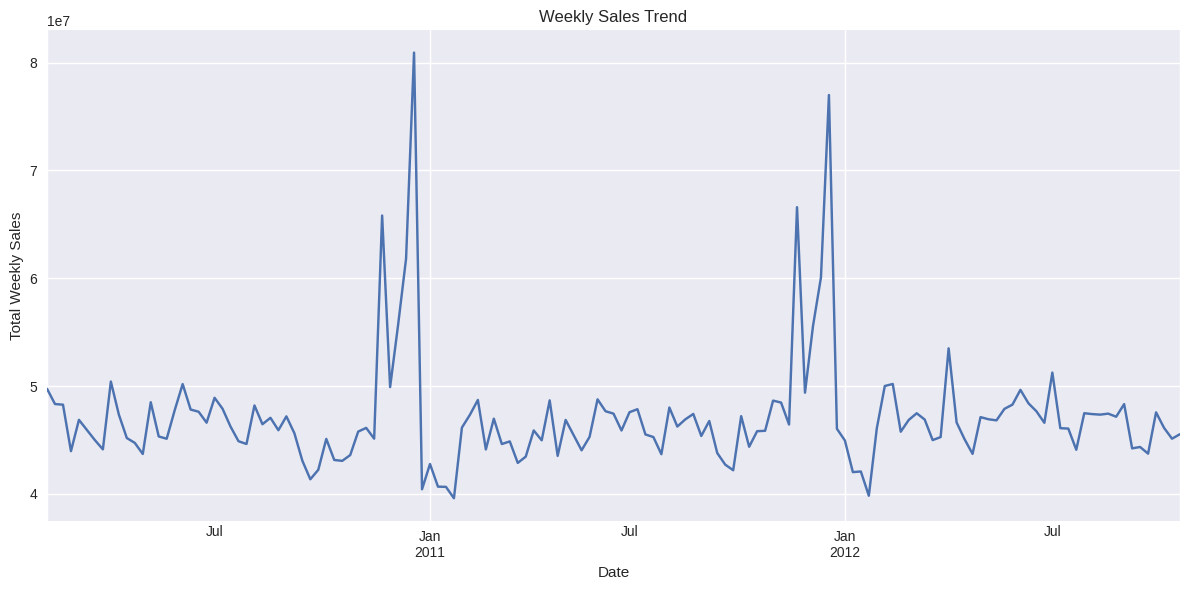

In [14]:
# Line plot showing total weekly sales progression over time
plt.figure(figsize=(12, 6))
train.groupby('Date')['Weekly_Sales'].sum().plot(title='Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

სეზონურობა გვაქვს

In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train['Weekly_Sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


ADF Statistic: -31.98878172401193
p-value: 0.0
Critical Values:
	1%: -3.4303655154786736
	5%: -2.861546857656134
	10%: -2.5667736500803486


ADF<0 
p<0.05
სტაციონალურია ანუ 

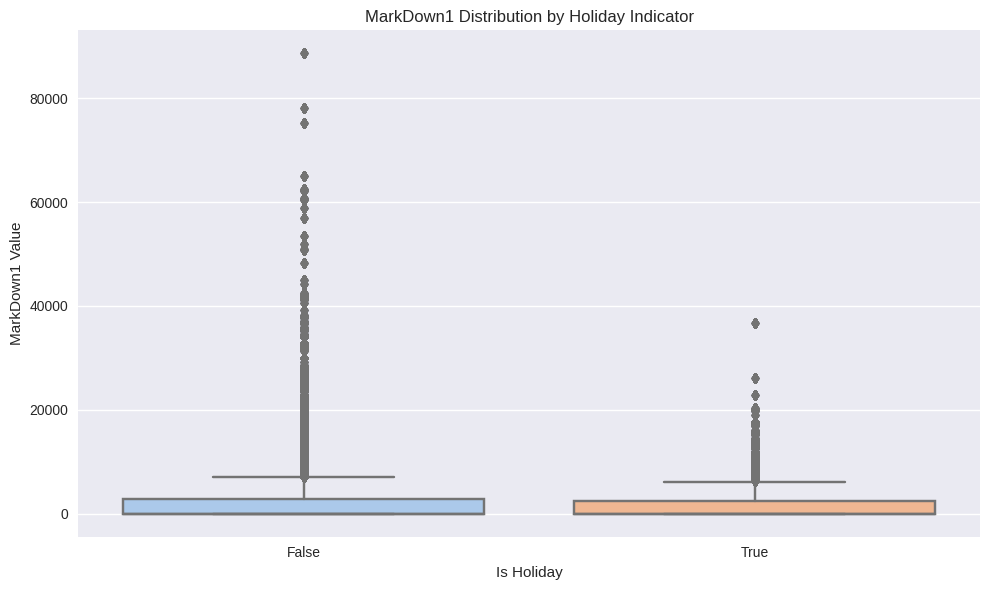

In [16]:
# Box plot showing distribution of MarkDown1 for holiday vs non-holiday weeks
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='IsHoliday', y='MarkDown1', palette='pastel')
plt.title('MarkDown1 Distribution by Holiday Indicator')
plt.xlabel('Is Holiday')
plt.ylabel('MarkDown1 Value')
plt.tight_layout()
plt.show()

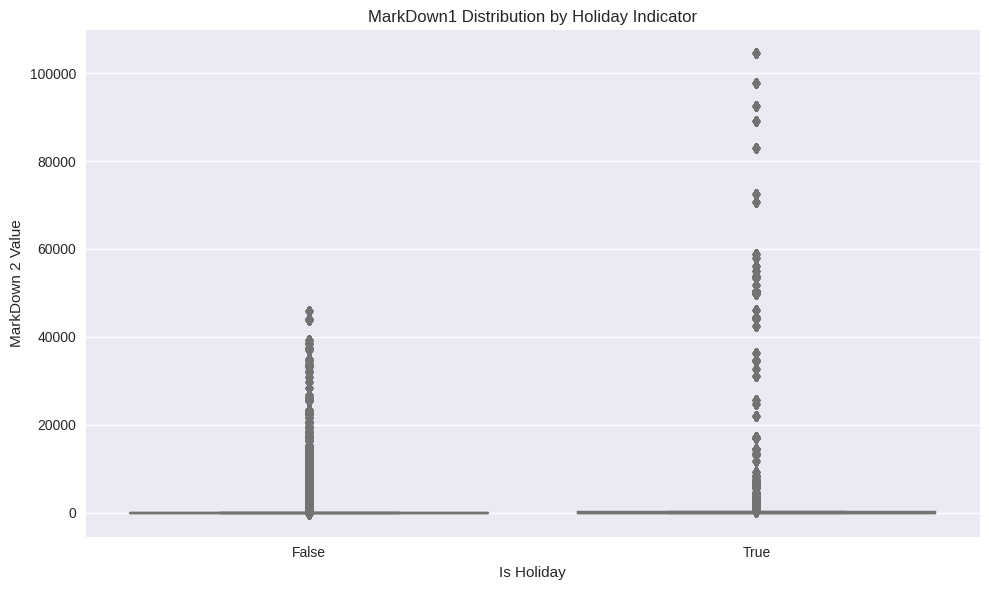

In [17]:
# Box plot showing distribution of MarkDown1 for holiday vs non-holiday weeks
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='IsHoliday', y='MarkDown2', palette='pastel')
plt.title('MarkDown1 Distribution by Holiday Indicator')
plt.xlabel('Is Holiday')
plt.ylabel('MarkDown 2 Value')
plt.tight_layout()
plt.show()

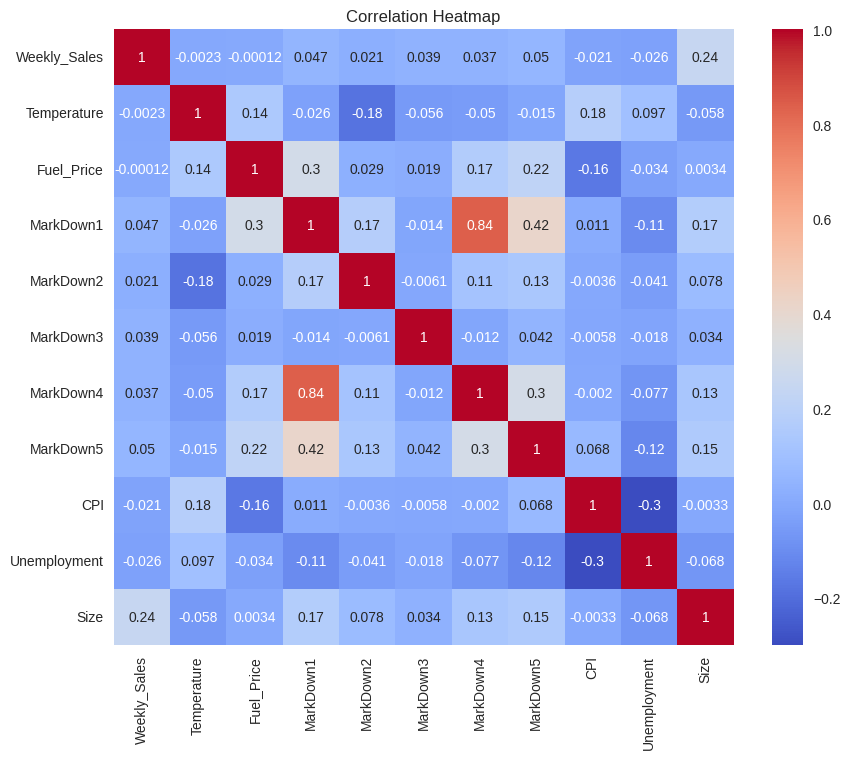

In [21]:
numeric_cols = train.select_dtypes(include=['float64', 'int64']).drop(columns=['Store', 'Dept']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
     

ანუ არ გვაქვს კორელაციები

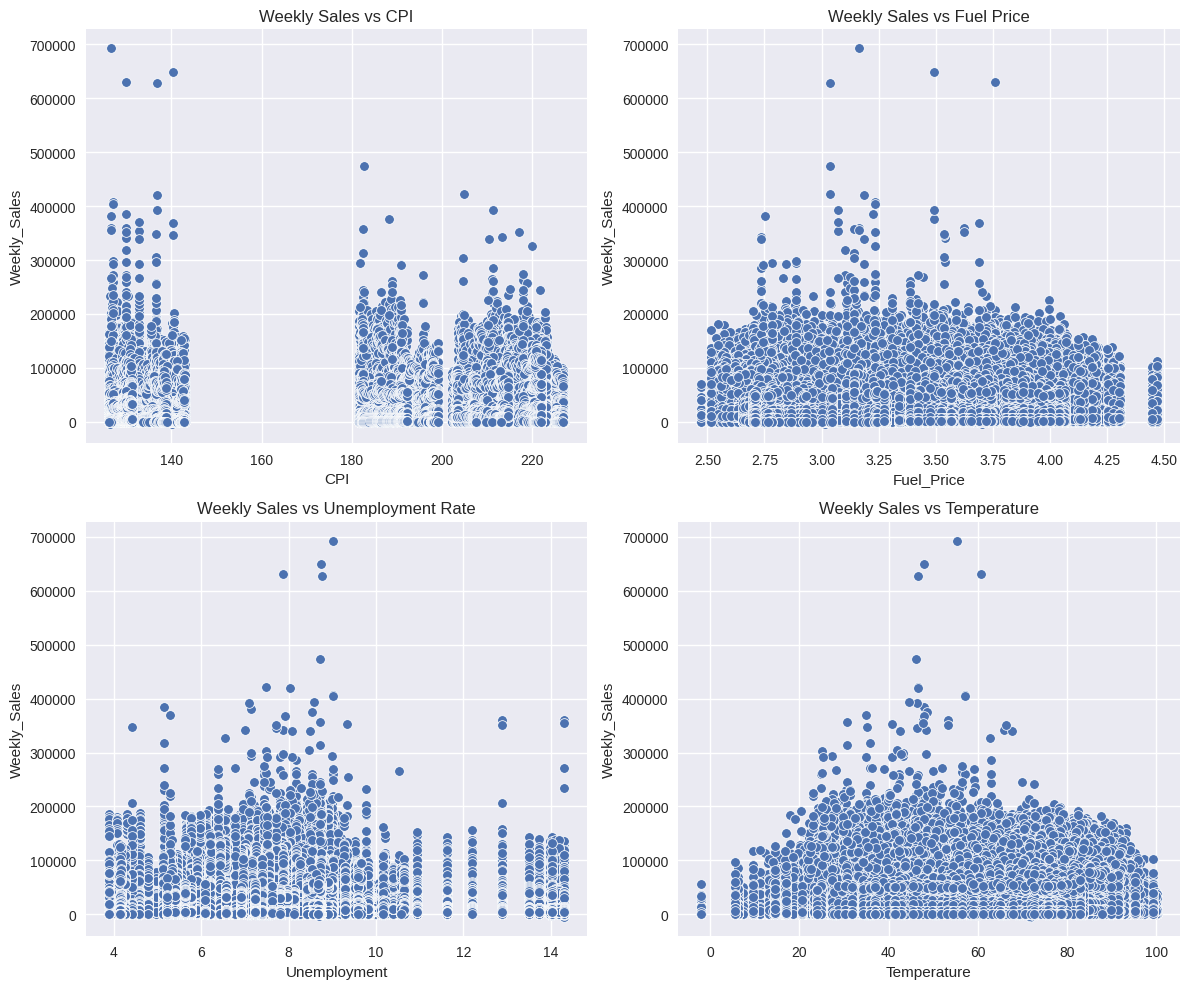

In [28]:

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each variable
sns.scatterplot(x='CPI', y='Weekly_Sales', data=train, ax=axes[0, 0])
axes[0, 0].set_title('Weekly Sales vs CPI')

sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=train, ax=axes[0, 1])
axes[0, 1].set_title('Weekly Sales vs Fuel Price')

sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=train, ax=axes[1, 0])
axes[1, 0].set_title('Weekly Sales vs Unemployment Rate')

sns.scatterplot(x='Temperature', y='Weekly_Sales', data=train, ax=axes[1, 1])
axes[1, 1].set_title('Weekly Sales vs Temperature')

# Adjust layout
plt.tight_layout()
plt.show()

რაიმე განსაკუთრებულ შედეგს არ იძლევიან

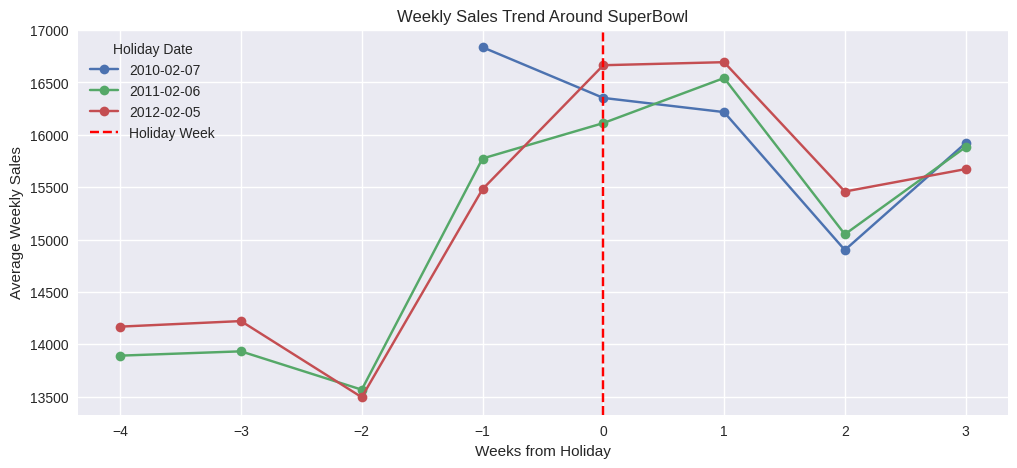

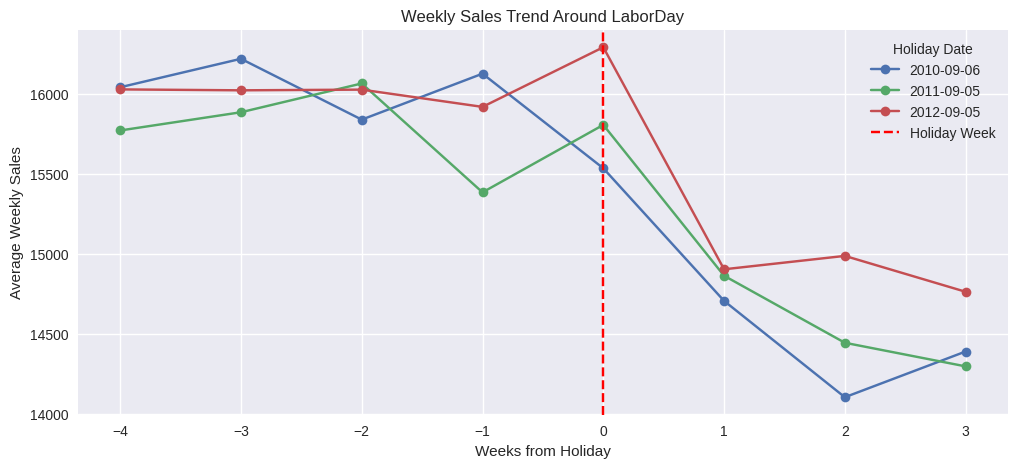

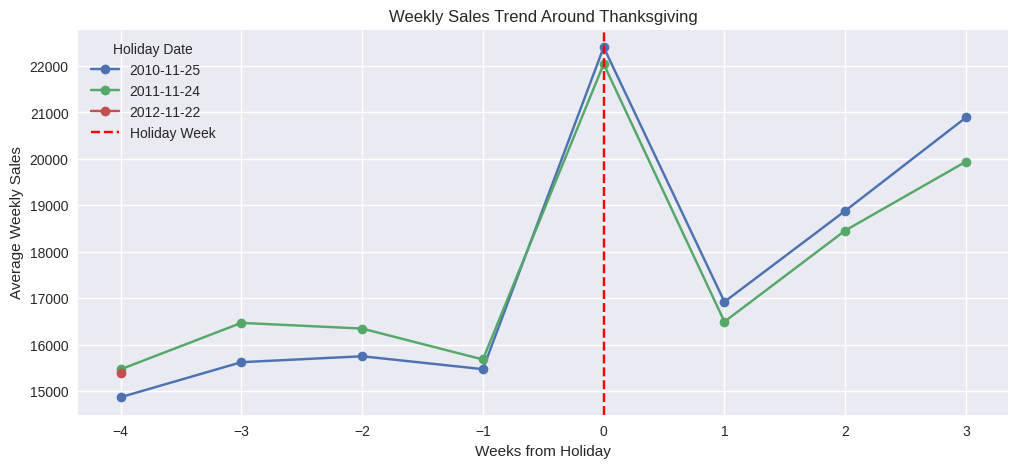

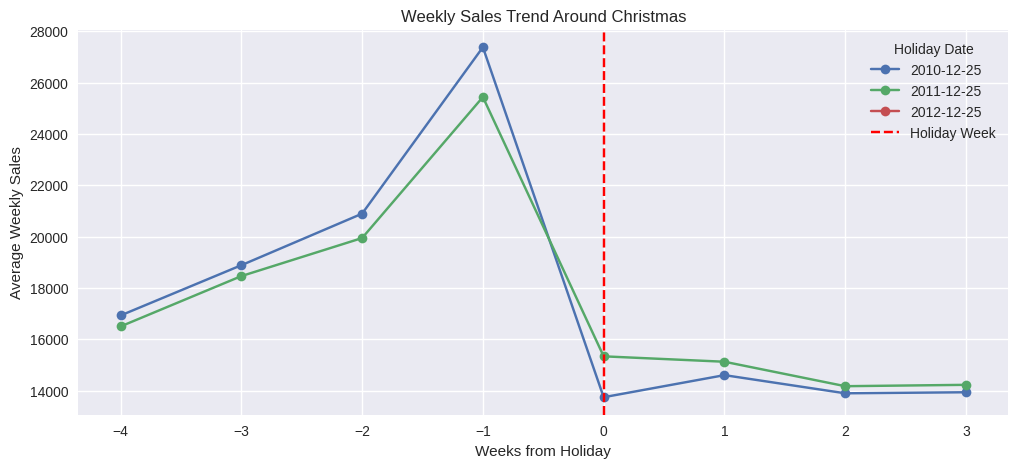

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'Date' is datetime
train['Date'] = pd.to_datetime(train['Date'])

# Define holiday dates (Sunday of SuperBowl, Monday of Labor Day, Thursday of Thanksgiving, 25th for Christmas)
holidays = {
    'SuperBowl': ['2010-02-07', '2011-02-06', '2012-02-05'],
    'LaborDay': ['2010-09-06', '2011-09-05', '2012-09-05'],
    'Thanksgiving': ['2010-11-25', '2011-11-24', '2012-11-22'],
    'Christmas': ['2010-12-25', '2011-12-25', '2012-12-25']
}

# Plotting function
def plot_holiday_sales_trend(train, holiday_name, dates, window=4):
    plt.figure(figsize=(12, 5))
    
    for d in dates:
        holiday_date = pd.to_datetime(d)
        mask = (train['Date'] >= holiday_date - pd.Timedelta(weeks=window)) & \
               (train['Date'] <= holiday_date + pd.Timedelta(weeks=window))
        df = train[mask].copy()
        df['WeekOffset'] = ((df['Date'] - holiday_date).dt.days // 7).astype(int)
        
        weekly_avg = df.groupby('WeekOffset')['Weekly_Sales'].mean().reset_index()
        plt.plot(weekly_avg['WeekOffset'], weekly_avg['Weekly_Sales'], marker='o', label=str(d)[:10])

    plt.axvline(0, color='red', linestyle='--', label='Holiday Week')
    plt.title(f'Weekly Sales Trend Around {holiday_name}')
    plt.xlabel('Weeks from Holiday')
    plt.ylabel('Average Weekly Sales')
    plt.legend(title='Holiday Date')
    plt.grid(True)
    plt.show()

# Plot each holiday
for name, dates in holidays.items():
    plot_holiday_sales_trend(train, name, dates, window=4)


გვაქვს 4 მნიშვნელოვანი დღე:
'SuperBowl','LaborDay','Thanksgiving','Christmas'
რომელებიც გავლენას ახდენენ გაყიდვებზე. 
გაყიდვები იცვლება მთელი კვირის განმავლობაში